Epoch 0
   1/1875 [..............................] - ETA: 10:45 - loss: 2.3096 - accuracy: 0.0625

2023-02-23 18:24:29.303198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.1926 - accuracy: 0.9423

2023-02-23 18:24:41.942673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 38ms/step


2023-02-23 18:24:43.041590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


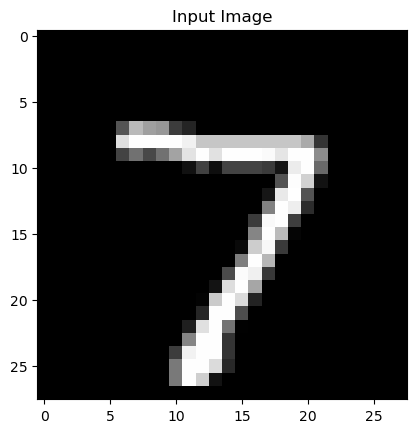

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

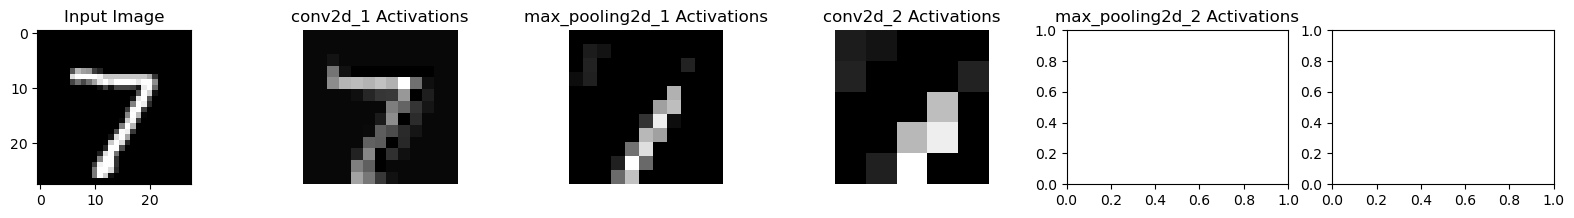

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_1'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_2'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(10, activation='softmax', name='dense')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a function to display the activations of each layer
def display_activations(activations, layer_names, input_image):
    # Display the input image
    plt.imshow(input_image.squeeze(), cmap='gray')
    plt.title('Input Image')
    plt.show()

    # Display the layer activations for the first test image
    fig, axs = plt.subplots(nrows=1, ncols=len(layer_names), figsize=(20, 2))
    
    for i, layer_activation in enumerate(activations):
        img = test_images[i]
        # Display the input image for the first layer
        if i == 0:
            axs[i].imshow(img.squeeze(), cmap='gray')
            axs[i].set_title('Input Image')
        else:
            # Display the activation maps for the other layers
            axs[i].set_title(layer_names[i-1] + ' Activations')
            for j in range(layer_activation.shape[-1]):
                row, col = divmod(j, 8)
                axs[i].imshow(layer_activation[0, :, :, j].squeeze(), cmap='gray')
                axs[i].axis('off')

    plt.suptitle(layer_names[i] + ' Activations', fontsize=16)
    plt.show()

# Train the model and display the activations after each epoch
for epoch in range(3):
    print('Epoch', epoch)
    history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))

    # Get the layer outputs and names
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Get the activations and display them for the first test image
    activations = activation_model.predict(test_images[:1])
    layer_names = [layer.name for layer in model.layers]
    display_activations(activations, layer_names, test_images[0])
